In [2]:
!pip install google

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os


os.chdir('/content/drive/MyDrive/Colab Notebooks/weapon-detection')

In [5]:
!pip install ultralytics tensorflow==2.13.1 wandb

INFO: pip is looking at multiple versions of wandb to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of pydantic to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.2/67.2 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.6/66.6 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.2/65.2 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 6.3 MB/s eta 0:00:00
INFO: pip is still looking at multiple versions of pydantic to determine which version is compatible with other requirements. This could take a while.
  

In [ ]:
!pip install matplotlib

In [ ]:
!pip install kagglehub

In [ ]:
import kagglehub


path = kagglehub.dataset_download("raghavnanjappan/weapon-dataset-for-yolov5")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/weapon-dataset-for-yolov5


In [ ]:
!cp -R '/kaggle/input/weapon-dataset-for-yolov5' '/content/drive/MyDrive/Colab Notebooks/weapon-detection/weapon-yolo5'

In [ ]:
# Class frequencies
import numpy as np


label_folders = [
    "/content/drive/MyDrive/Colab Notebooks/weapon-detection/weapon-yolo5/labels/train",
    "/content/drive/MyDrive/Colab Notebooks/weapon-detection/weapon-yolo5/labels/val"
]


def distribution(path):

  class_frequencies = np.array([])
  print(len(os.listdir(path)))

  for file_name in os.listdir(path):
    if file_name.endswith('.txt'):
      file_path = os.path.join(path, file_name)
      with open(file_path, 'r') as file:
        first_tokens = [line.strip().split()[0] for line in file if line.strip()]

      class_frequencies = np.append(class_frequencies, first_tokens)
  print(class_frequencies)

  unique, counts = np.unique(class_frequencies, return_counts=True)
  return unique, counts


unique_train, counts_train = distribution(label_folders[0])
unique_val, counts_val = distribution(label_folders[1])

4000
['1' '1' '1' ... '0' '0' '1']
156
['0' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '0' '1' '1' '0' '1'
 '1' '1' '1' '1' '1' '0' '1' '1' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '0' '1' '1' '1' '1' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0']


In [ ]:
labels_map = {
    '0' : 'Knife',
    '1' : 'Handgun',
}

unique_mapped_train = [labels_map[x] for x in unique_train]
unique_mapped_val = [labels_map[x] for x in unique_val]

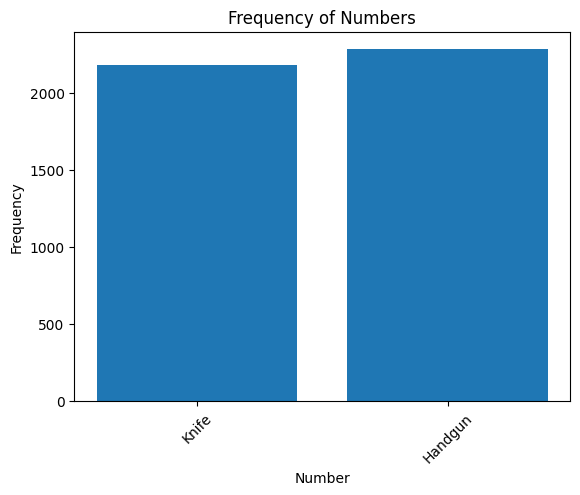

In [ ]:
# Train distribution
import matplotlib.pyplot as plt


plt.bar(unique_mapped_train, counts_train)

plt.xlabel('Number')
plt.ylabel('Frequency')
plt.title('Frequency of Numbers')
plt.xticks(rotation=45)

plt.show()

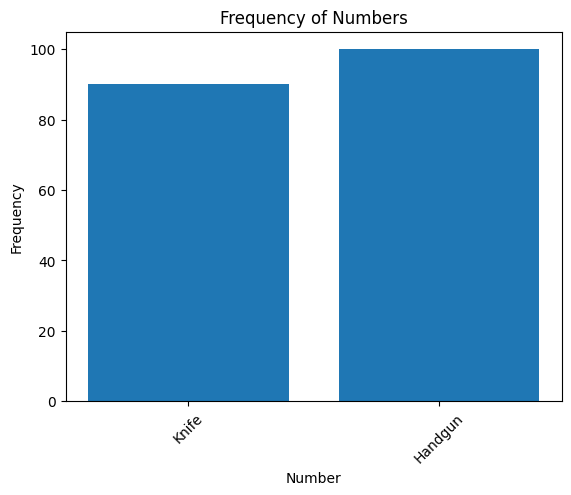

In [ ]:
# Validation distribution

plt.bar(unique_mapped_val, counts_val)

plt.xlabel('Number')
plt.ylabel('Frequency')
plt.title('Frequency of Numbers')
plt.xticks(rotation=45)

plt.show()

In [1]:
!pip uninstall torchvision torch
!pip install torch==2.6.0 torchvision==0.21.0 --no-cache-dir

Found existing installation: torchvision 0.16.2
Uninstalling torchvision-0.16.2:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/torchvision-0.16.2.dist-info/*
    /usr/local/lib/python3.11/dist-packages/torchvision.libs/libcudart.7ec1eba6.so.12
    /usr/local/lib/python3.11/dist-packages/torchvision.libs/libjpeg.ceea7512.so.62
    /usr/local/lib/python3.11/dist-packages/torchvision.libs/libnvjpeg.f00ca762.so.12
    /usr/local/lib/python3.11/dist-packages/torchvision.libs/libpng16.7f72a3c5.so.16
    /usr/local/lib/python3.11/dist-packages/torchvision.libs/libz.0ba23de2.so.1
    /usr/local/lib/python3.11/dist-packages/torchvision/*
Proceed (Y/n)? y
  Successfully uninstalled torchvision-0.16.2
Found existing installation: torch 2.1.2
Uninstalling torch-2.1.2:
  Would remove:
    /usr/local/bin/convert-caffe2-to-onnx
    /usr/local/bin/convert-onnx-to-caffe2
    /usr/local/bin/torchrun
    /usr/local/lib/python3.11/dist-packages/functorch/*
    /usr/local/lib/python3.11/dist-

In [ ]:
import torch
from torch.nn import Sequential, Conv2d, MaxPool2d, Flatten, Linear
from ultralytics.nn.tasks import DetectionModel
from ultralytics.nn.modules import Conv, Bottleneck, C2f, SPPF, Detect, Proto

torch.serialization.add_safe_globals([
    DetectionModel, Sequential, Conv2d, MaxPool2d, Flatten, Linear,
    Conv, Bottleneck, C2f, SPPF, Detect, Proto
])

from ultralytics import YOLO

import wandb

import os
os.environ.pop("WANDB_MODE", None)
os.environ["WANDB_API_KEY"] = "e94d271cf2ccb4a5df1747750e6bc4a9d2574026"


run = wandb.init(
    project="weapon-detection",
    name="weapon-yolo5",
    config={
        "epochs": 50,
        "imgsz": 640,
        "batch": 16,
        "model": "yolov8x.pt",
        "data": "/content/drive/MyDrive/Colab Notebooks/weapon-detection/weapon-yolo5/dataset.yaml"
    },
        reinit=True
)

if run:
    print("✅ wandb.run активен:", run.name)
else:
    print("⚠️ wandb.run не был создан")

model = YOLO("yolov8x.pt")
model.train(
    data="/content/drive/MyDrive/Colab Notebooks/weapon-detection/weapon-yolo5/dataset.yaml",
    epochs=50,
    imgsz=640,
    batch=16,
    project="/content/drive/MyDrive/Colab Notebooks/weapon-detection",
    name="weapon-yolo5",
    patience=15,
    save_period=1
)

✅ wandb.run активен: weapon-yolo5


100%|██████████| 131M/131M [00:01<00:00, 118MB/s]


Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Colab Notebooks/weapon-detection/weapon-yolo5/dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8x.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=weapon-yolo52, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, pat

100%|██████████| 755k/755k [00:00<00:00, 24.1MB/s]

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              


  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics.nn.modules.conv.Conv             [640, 640, 3, 2]              
  8                  -1  3   6969600  ultralytics.nn.modules.block.C2f             [640, 640, 3, True]           
  9                  -1  1   1025920  ultralytics.nn.modules.block.SPPF            [640, 640, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  3   7379200  ultralytics.nn.modules.block.C2f             [1280, 640, 3]                
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]  

100%|██████████| 5.35M/5.35M [00:00<00:00, 78.9MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.5±0.2 ms, read: 0.1±0.1 MB/s, size: 37.7 KB)


train: Scanning /content/drive/MyDrive/Colab Notebooks/weapon-detection/weapon-yolo5/labels/train.cache... 4000 images, 2 backgrounds, 0 corrupt: 100%|██████████| 4000/4000 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 2.4±3.8 ms, read: 0.1±0.2 MB/s, size: 57.3 KB)


val: Scanning /content/drive/MyDrive/Colab Notebooks/weapon-detection/weapon-yolo5/labels/val.cache... 156 images, 0 backgrounds, 0 corrupt: 100%|██████████| 156/156 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/Colab Notebooks/weapon-detection/weapon-yolo52/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/Colab Notebooks/weapon-detection/weapon-yolo52
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      11.7G      1.564      2.266      1.867         44        640: 100%|██████████| 250/250 [24:32<00:00,  5.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.08s/it]

                   all        156        190      0.641      0.175      0.167     0.0796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      12.4G      1.698      2.302      1.966         35        640: 100%|██████████| 250/250 [05:08<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.13it/s]

                   all        156        190      0.675      0.115      0.102     0.0511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      12.4G      1.623      2.191      1.887         35        640: 100%|██████████| 250/250 [05:11<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.12it/s]

                   all        156        190      0.789      0.145      0.173     0.0804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      12.4G      1.509      2.005      1.809         41        640: 100%|██████████| 250/250 [05:17<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.14it/s]

                   all        156        190      0.599      0.176      0.209      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      12.2G       1.45      1.882      1.743         40        640: 100%|██████████| 250/250 [05:17<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.08it/s]

                   all        156        190       0.78       0.22      0.287      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      12.4G      1.382      1.793        1.7         36        640: 100%|██████████| 250/250 [05:10<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.11it/s]

                   all        156        190      0.439      0.305      0.312      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      12.2G      1.329      1.687      1.651         45        640: 100%|██████████| 250/250 [05:11<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.13it/s]

                   all        156        190      0.812       0.19      0.267      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      12.4G      1.316      1.657      1.644         45        640: 100%|██████████| 250/250 [05:12<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.13it/s]

                   all        156        190      0.407      0.293      0.307      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      12.2G      1.279      1.601       1.62         33        640: 100%|██████████| 250/250 [05:11<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.14it/s]

                   all        156        190      0.481      0.393      0.371      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      12.4G      1.248      1.506      1.589         41        640: 100%|██████████| 250/250 [05:17<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.14it/s]

                   all        156        190      0.606      0.395      0.436      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      12.2G      1.222      1.477      1.573         33        640: 100%|██████████| 250/250 [05:16<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.10it/s]

                   all        156        190      0.478      0.365       0.39      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      12.4G      1.208      1.449      1.563         40        640: 100%|██████████| 250/250 [05:11<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.12it/s]

                   all        156        190      0.508      0.438      0.479      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      12.2G      1.186      1.385      1.539         43        640: 100%|██████████| 250/250 [05:16<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.11it/s]

                   all        156        190      0.441       0.45      0.431      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      12.4G      1.175      1.385       1.53         47        640: 100%|██████████| 250/250 [05:10<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.12it/s]

                   all        156        190      0.413      0.453       0.43      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      12.2G      1.139      1.335      1.504         34        640: 100%|██████████| 250/250 [05:11<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.14it/s]

                   all        156        190      0.435      0.514      0.494      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      12.5G      1.146      1.328      1.503         44        640: 100%|██████████| 250/250 [05:16<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.11it/s]

                   all        156        190      0.535      0.473       0.48      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      12.2G      1.117      1.301      1.491         25        640: 100%|██████████| 250/250 [05:17<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.13it/s]

                   all        156        190       0.51      0.414      0.417      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      12.5G      1.108      1.259      1.479         40        640: 100%|██████████| 250/250 [05:11<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.12it/s]

                   all        156        190       0.53      0.509        0.5       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      12.2G      1.078      1.209       1.46         39        640: 100%|██████████| 250/250 [05:11<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.14it/s]

                   all        156        190      0.602       0.56      0.584      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      12.4G      1.084      1.216       1.46         32        640: 100%|██████████| 250/250 [05:16<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.10it/s]

                   all        156        190      0.482      0.528      0.505      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      12.2G      1.055      1.181       1.44         35        640: 100%|██████████| 250/250 [05:11<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.12it/s]

                   all        156        190      0.636      0.498       0.52      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      12.4G      1.054      1.169      1.438         38        640: 100%|██████████| 250/250 [05:11<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.12it/s]

                   all        156        190      0.678      0.546      0.602      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      12.2G      1.058      1.152      1.437         30        640: 100%|██████████| 250/250 [05:17<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.12it/s]

                   all        156        190      0.513      0.474      0.515      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      12.4G       1.04      1.134      1.428         32        640: 100%|██████████| 250/250 [05:10<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.11it/s]

                   all        156        190      0.615      0.549      0.582      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      12.2G      1.043      1.133      1.424         50        640: 100%|██████████| 250/250 [05:17<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.13it/s]

                   all        156        190      0.569       0.59      0.571      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      12.4G       1.03      1.109      1.414         37        640: 100%|██████████| 250/250 [05:10<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.11it/s]

                   all        156        190      0.507      0.535      0.548      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      12.2G      1.017      1.074       1.41         34        640: 100%|██████████| 250/250 [05:11<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.14it/s]

                   all        156        190      0.527      0.582      0.553      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      12.4G     0.9983      1.057      1.392         42        640: 100%|██████████| 250/250 [05:17<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.04it/s]

                   all        156        190      0.491      0.539      0.533      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      12.2G     0.9983      1.062      1.388         36        640: 100%|██████████| 250/250 [05:10<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.13it/s]

                   all        156        190       0.59      0.562      0.591      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      12.4G     0.9774       1.04      1.376         38        640: 100%|██████████| 250/250 [05:11<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.13it/s]

                   all        156        190      0.666      0.536      0.594      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      12.2G     0.9855      1.029      1.382         35        640: 100%|██████████| 250/250 [05:11<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.14it/s]

                   all        156        190      0.656      0.522      0.577      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      12.4G     0.9611      0.985      1.361         31        640: 100%|██████████| 250/250 [05:17<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.10it/s]

                   all        156        190      0.551      0.575      0.561        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      12.2G      0.976     0.9775      1.369         41        640: 100%|██████████| 250/250 [05:11<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.12it/s]

                   all        156        190      0.619      0.567      0.606      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      12.4G     0.9442     0.9362      1.346         36        640: 100%|██████████| 250/250 [05:11<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.14it/s]

                   all        156        190      0.716      0.554      0.632      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      12.2G     0.9429     0.9342      1.339         45        640: 100%|██████████| 250/250 [05:18<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.11it/s]

                   all        156        190      0.716      0.611      0.657      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      12.4G     0.9378     0.9342      1.339         38        640: 100%|██████████| 250/250 [05:17<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.13it/s]

                   all        156        190      0.628      0.566      0.598      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      12.2G     0.9162     0.9032      1.327         27        640: 100%|██████████| 250/250 [05:10<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.06it/s]

                   all        156        190      0.624      0.564      0.583      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      12.4G     0.9264      0.897      1.333         36        640: 100%|██████████| 250/250 [05:11<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.14it/s]

                   all        156        190      0.626      0.627      0.651      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      12.2G     0.9054     0.8687      1.316         31        640: 100%|██████████| 250/250 [05:17<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.13it/s]

                   all        156        190      0.665      0.567       0.62      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      12.4G     0.8997     0.8531      1.318         36        640: 100%|██████████| 250/250 [05:11<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.12it/s]

                   all        156        190      0.665      0.553      0.628      0.331


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      12.2G     0.9584     0.8073       1.38         16        640: 100%|██████████| 250/250 [05:10<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.12it/s]

                   all        156        190       0.62      0.569      0.617      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      12.4G     0.9373     0.7504      1.363         18        640: 100%|██████████| 250/250 [05:10<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.12it/s]

                   all        156        190      0.604       0.64      0.642      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      12.2G     0.9276     0.7328      1.364         16        640: 100%|██████████| 250/250 [05:10<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.14it/s]

                   all        156        190      0.647      0.606      0.614      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      12.4G     0.9293     0.7441      1.353         16        640:  25%|██▌       | 63/250 [01:23<03:45,  1.21s/it]